In [12]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import datetime
import csv
import tweepy
import numpy as np
import pandas as pd


consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [13]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [14]:
for tweet in api.search('Flipkart'):
    print(tweet.text)

#boycotflipkart

2 items I returned and flipkart blocked my account. They said high numbers of returns. 😭 https://t.co/7qc1YwYbdr
RT @HiHonorIndia: It’s Xciting! It’s Xplosive! It’s Xceptional! That’s the #HONOR X series you’ve always loved! Be prepared to experience a…
@Flipkart thanks for the damaging my home with your low quality products. In this picture: a wardrobe from Flipkart… https://t.co/nLvyq0uPUP
People who r buying products in Flipkart don't buy things from seller called Grab basket because he is not giving r… https://t.co/QbbxWWrg2z
@Flipkart 
@flipkartsupport 
Flipkart never fails to disappoint you
Your guys lost my product in warehouse
Now cust… https://t.co/Zglso97iZC
Four fraudsters from Kabirpur in Bihar were arrested by cyber crime police of @cyberabadpolice for cheating people… https://t.co/LsnzjKzKnl
The Legacy Of X Continues
https://t.co/goa6RF6IFA
@Flipkart @flipkartsupport 
Flipkart never fails to disappoint you
Your guys lost my product in warehouse
Now custo…

In [15]:
df = pd.DataFrame(columns = ['Tweets', 'User', 'User_statuses_count', 
                             'user_followers', 'User_location', 'rt_count', 'tweet_date'])

In [16]:
def stream(data, file_name):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100, lang='en').items():
        print(i, end='\r')
        df.loc[i, 'Tweets'] = tweet.text
        df.loc[i, 'User'] = tweet.user.name
        df.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        df.loc[i, 'user_followers'] = tweet.user.followers_count
        df.loc[i, 'User_location'] = tweet.user.location
        df.loc[i, 'rt_count'] = tweet.retweet_count
        df.loc[i, 'tweet_date'] = tweet.created_at
        df.to_excel('{}.xlsx'.format(file_name))
        i+=1
        if i == 2000:
            break
        else:
            pass

In [17]:
stream(data = ['Flipkart'], file_name = 'Flipkart')

In [18]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,rt_count,tweet_date
0,#boycotflipkart\n\n2 items I returned and flip...,samrat,33,0,,0,2020-01-03 07:18:01
1,RT @HiHonorIndia: It’s Xciting! It’s Xplosive!...,Aarti Pareek,4190,92,,22,2020-01-03 07:17:43
2,@Flipkart thanks for the damaging my home with...,Durgesh Kaushik,993,1012,India,0,2020-01-03 07:17:23
3,People who r buying products in Flipkart don't...,Dileepcherukuru,8,0,"Bengaluru South, India",0,2020-01-03 07:17:16
4,@Flipkart \n@flipkartsupport \nFlipkart never ...,Abhishek Khetrapal,373,71,"Varanasi, India",0,2020-01-03 07:17:11


In [20]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
#cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 7 columns):
Tweets                 2000 non-null object
User                   2000 non-null object
User_statuses_count    2000 non-null object
user_followers         2000 non-null object
User_location          2000 non-null object
rt_count               2000 non-null object
tweet_date             2000 non-null object
dtypes: object(7)
memory usage: 205.0+ KB


In [22]:
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split())

In [23]:
def analyze_emotions(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity <= -0.75:
        return 'Anger'
    elif analysis.sentiment.polarity <= -0.50:
        return 'disgust'
    elif analysis.sentiment.polarity <= -0.25:
        return 'Anticipation'
    elif analysis.sentiment.polarity <= -0.01:
        return 'fear'
    elif analysis.sentiment.polarity == 0:
        return 'joy'
    elif analysis.sentiment.polarity <= 0.25:
        return 'sadness'
    elif analysis.sentiment.polarity <= 0.50:
        return 'surprise'
    elif analysis.sentiment.polarity <= 0.75:
        return 'trust'
    else:
        return 'All Good'
   

In [24]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral' 

In [25]:
import re
df['clean_tweet'] = df['Tweets'].apply(lambda x: clean_tweet(x))
df['Sentiment']=df['clean_tweet'].apply(lambda x: analyze_sentiment(x))
df['Emotions'] = df['clean_tweet'].apply(lambda x: analyze_emotions(x))
df['sentimentpolarity'] = df.clean_tweet.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [26]:
df

,Tweets,User,User_statuses_count,user_followers,User_location,rt_count,tweet_date,clean_tweet,Sentiment,Emotions,sentimentpolarity
0,#boycotflipkart\n\n2 items I returned and flip...,samrat,33,0,,0,2020-01-03 07:18:01,boycotflipkart 2 items I returned and flipkart...,Positive,sadness,0.160000
1,RT @HiHonorIndia: It’s Xciting! It’s Xplosive!...,Aarti Pareek,4190,92,,22,2020-01-03 07:17:43,RT It s Xciting It s Xplosive It s Xceptional ...,Positive,trust,0.700000
2,@Flipkart thanks for the damaging my home with...,Durgesh Kaushik,993,1012,India,0,2020-01-03 07:17:23,thanks for the damaging my home with your low ...,Positive,sadness,0.100000
3,People who r buying products in Flipkart don't...,Dileepcherukuru,8,0,"Bengaluru South, India",0,2020-01-03 07:17:16,People who r buying products in Flipkart don t...,Neutral,joy,0.000000
4,@Flipkart \n@flipkartsupport \nFlipkart never ...,Abhishek Khetrapal,373,71,"Varanasi, India",0,2020-01-03 07:17:11,Flipkart never fails to disappoint you Your gu...,Positive,sadness,0.250000
5,Four fraudsters from Kabirpur in Bihar were ar...,mahesh buddi,922,410,,0,2020-01-03 07:16:14,Four fraudsters from Kabirpur in Bihar were ar...,Neutral,joy,0.000000
6,The Legacy Of X Continues\nhttps://t.co/goa6RF...,arya,21207,183,AMETHI,0,2020-01-03 07:15:36,The Legacy Of X Continues,Neutral,joy,0.000000
7,@Flipkart @flipkartsupport \nFlipkart never fa...,Abhishek Khetrapal,373,71,"Varanasi, India",0,2020-01-03 07:15:35,Flipkart never fails to disappoint you Your gu...,Positive,sadness,0.250000
8,Kind attn @amazonIN @Flipkart https://t.co/qpi...,பாகவதர்,30534,376,,0,2020-01-03 07:15:32,Kind attn,Positive,trust,0.600000
9,Flipkart – Buy Gionee EBT1W Bluetooth Headset ...,Dealnloot,40768,783,Chandigarh,0,2020-01-03 07:14:25,Flipkart Buy Gionee EBT1W Bluetooth Headset wi...,Negative,fear,-0.166667


In [28]:
df[~df.clean_tweet.str.startswith('RT')]

,Tweets,User,User_statuses_count,user_followers,User_location,rt_count,tweet_date,clean_tweet,Sentiment,Emotions,sentimentpolarity
0,#boycotflipkart\n\n2 items I returned and flip...,samrat,33,0,,0,2020-01-03 07:18:01,boycotflipkart 2 items I returned and flipkart...,Positive,sadness,0.160000
2,@Flipkart thanks for the damaging my home with...,Durgesh Kaushik,993,1012,India,0,2020-01-03 07:17:23,thanks for the damaging my home with your low ...,Positive,sadness,0.100000
3,People who r buying products in Flipkart don't...,Dileepcherukuru,8,0,"Bengaluru South, India",0,2020-01-03 07:17:16,People who r buying products in Flipkart don t...,Neutral,joy,0.000000
4,@Flipkart \n@flipkartsupport \nFlipkart never ...,Abhishek Khetrapal,373,71,"Varanasi, India",0,2020-01-03 07:17:11,Flipkart never fails to disappoint you Your gu...,Positive,sadness,0.250000
5,Four fraudsters from Kabirpur in Bihar were ar...,mahesh buddi,922,410,,0,2020-01-03 07:16:14,Four fraudsters from Kabirpur in Bihar were ar...,Neutral,joy,0.000000
6,The Legacy Of X Continues\nhttps://t.co/goa6RF...,arya,21207,183,AMETHI,0,2020-01-03 07:15:36,The Legacy Of X Continues,Neutral,joy,0.000000
7,@Flipkart @flipkartsupport \nFlipkart never fa...,Abhishek Khetrapal,373,71,"Varanasi, India",0,2020-01-03 07:15:35,Flipkart never fails to disappoint you Your gu...,Positive,sadness,0.250000
8,Kind attn @amazonIN @Flipkart https://t.co/qpi...,பாகவதர்,30534,376,,0,2020-01-03 07:15:32,Kind attn,Positive,trust,0.600000
9,Flipkart – Buy Gionee EBT1W Bluetooth Headset ...,Dealnloot,40768,783,Chandigarh,0,2020-01-03 07:14:25,Flipkart Buy Gionee EBT1W Bluetooth Headset wi...,Negative,fear,-0.166667
10,45%OFF Fogg Extreme Perfume Body Spray -...,www.bigdealonline.in,8191,126,India,0,2020-01-03 07:14:12,45 OFF Fogg Extreme Perfume Body Spray For Men...,Negative,fear,-0.125000


In [29]:
df

,Tweets,User,User_statuses_count,user_followers,User_location,rt_count,tweet_date,clean_tweet,Sentiment,Emotions,sentimentpolarity
0,#boycotflipkart\n\n2 items I returned and flip...,samrat,33,0,,0,2020-01-03 07:18:01,boycotflipkart 2 items I returned and flipkart...,Positive,sadness,0.160000
1,RT @HiHonorIndia: It’s Xciting! It’s Xplosive!...,Aarti Pareek,4190,92,,22,2020-01-03 07:17:43,RT It s Xciting It s Xplosive It s Xceptional ...,Positive,trust,0.700000
2,@Flipkart thanks for the damaging my home with...,Durgesh Kaushik,993,1012,India,0,2020-01-03 07:17:23,thanks for the damaging my home with your low ...,Positive,sadness,0.100000
3,People who r buying products in Flipkart don't...,Dileepcherukuru,8,0,"Bengaluru South, India",0,2020-01-03 07:17:16,People who r buying products in Flipkart don t...,Neutral,joy,0.000000
4,@Flipkart \n@flipkartsupport \nFlipkart never ...,Abhishek Khetrapal,373,71,"Varanasi, India",0,2020-01-03 07:17:11,Flipkart never fails to disappoint you Your gu...,Positive,sadness,0.250000
5,Four fraudsters from Kabirpur in Bihar were ar...,mahesh buddi,922,410,,0,2020-01-03 07:16:14,Four fraudsters from Kabirpur in Bihar were ar...,Neutral,joy,0.000000
6,The Legacy Of X Continues\nhttps://t.co/goa6RF...,arya,21207,183,AMETHI,0,2020-01-03 07:15:36,The Legacy Of X Continues,Neutral,joy,0.000000
7,@Flipkart @flipkartsupport \nFlipkart never fa...,Abhishek Khetrapal,373,71,"Varanasi, India",0,2020-01-03 07:15:35,Flipkart never fails to disappoint you Your gu...,Positive,sadness,0.250000
8,Kind attn @amazonIN @Flipkart https://t.co/qpi...,பாகவதர்,30534,376,,0,2020-01-03 07:15:32,Kind attn,Positive,trust,0.600000
9,Flipkart – Buy Gionee EBT1W Bluetooth Headset ...,Dealnloot,40768,783,Chandigarh,0,2020-01-03 07:14:25,Flipkart Buy Gionee EBT1W Bluetooth Headset wi...,Negative,fear,-0.166667


In [51]:
df['Emotions'].value_counts().iplot(kind='bar', xTitle='Sentiment',
                                    yTitle='Count', title='Customer Emotions Distribution for Flipkart')

In [52]:
df['Sentiment'].value_counts().iplot(kind='bar', xTitle='Sentiment',
                                    yTitle='Count', title='Overall Sentiment Distribution For Flipkart')

In [49]:
all_tweets = ' '.join(tweet for tweet in df['Emotions'])


wordcloud = WordCloud(stopwords=STOPWORDS).generate(all_tweets)

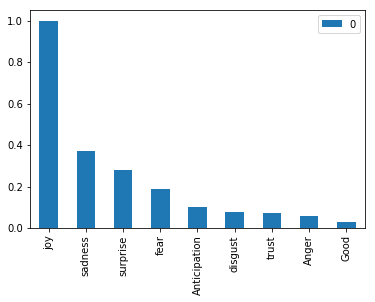

In [50]:
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq = df_freq.head(20)
df_freq.plot.bar()